# Histopathologic Cancer Detection
###### Identify metastic tissue in histopathologic scans of lymph node sections

## Imports

In [72]:
%matplotlib inline

import os
import cv2
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import time

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Dense, Activation, Input, Lambda
from tensorflow.keras import Model
from tensorflow.keras.callbacks import ModelCheckpoint

## Parameters

## Load Data

In [25]:
train_X = []
train_y = []

df = pd.read_csv('dataset\\train_labels.csv')

for index, row in df.iterrows():
    img_id = row["id"]
    train_X.append(cv2.imread(f'dataset\\train\\{img_id}.tif'))
    train_y.append(row["label"])
    
train_X = np.array(train_X)
train_y = np.array(train_y)
    

In [45]:
print(train_X.shape)
print(train_y.shape)

(220025, 96, 96, 3)
(220025,)


## Display a randomly selected image

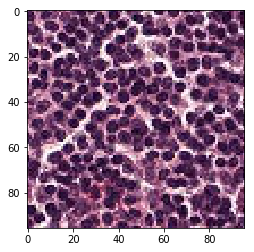

In [44]:
for img in train_X[np.random.choice(len(train_X), size=1, replace=False)]:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()

# ResNet50

In [73]:
img_input = Input(shape=(96,96,3))
norm = Lambda(lambda x: ((x/255.0) - 0.5))(img_input)

resnet = ResNet50(include_top=False, weights=None,input_tensor=norm, input_shape=(96,96,3), pooling='max')
x = resnet.output
x = Dense(1)(x)
output = Activation('sigmoid')(x)

model = Model(inputs=img_input, outputs=output)
print(model.summary())

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=["accuracy"])
checkpoint = ModelCheckpoint("model.h5", monitor='val_loss', verbose=1,save_best_only=True, mode='min')

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_17 (InputLayer)           (None, 96, 96, 3)    0                                            
__________________________________________________________________________________________________
lambda_4 (Lambda)               (None, 96, 96, 3)    0           input_17[0][0]                   
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 102, 102, 3)  0           lambda_4[0][0]                   
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 48, 48, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (

In [ ]:
model.fit(train_X, train_y, validation_split=0.2, callbacks=[checkpoint], epochs=50)

Train on 176020 samples, validate on 44005 samples
Epoch 1/50
176000/176020 [============================>.] - ETA: 0s - loss: 0.5394 - acc: 0.7904
Epoch 00001: val_loss improved from inf to 0.78403, saving model to model.h5
176020/176020 [==============================] - 635s 4ms/step - loss: 0.5394 - acc: 0.7904 - val_loss: 0.7840 - val_acc: 0.6918
Epoch 2/50
176000/176020 [============================>.] - ETA: 0s - loss: 0.4539 - acc: 0.8170- ETA: 7s - loss: 0.4540 - acc: 0.81
Epoch 00002: val_loss improved from 0.78403 to 0.65854, saving model to model.h5
176020/176020 [==============================] - 548s 3ms/step - loss: 0.4539 - acc: 0.8170 - val_loss: 0.6585 - val_acc: 0.8062
Epoch 3/50
106432/176020 [=================>............] - ETA: 3:23 - loss: 0.4643 - acc: 0.8142